In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
titanic_survival = pd.read_csv("./data/train.csv")

In [3]:
titanic_survival

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic_survival.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
titanic_survival.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic_survival.groupby(["Sex"])["Survived"].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [7]:
titanic_survival.drop(columns=["Name","Ticket","Cabin"] , inplace = True)

In [8]:
titanic_survival

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [9]:
survived_total = titanic_survival["Survived"].sum()

In [10]:
passengers_on_board = len(titanic_survival)



$$
\text{survival rate} = \frac{\text{survived}}{\text{total}}
$$




In [11]:
survival_rate = (survived_total / passengers_on_board) * 100

In [12]:
survival_rate

38.38383838383838

### There are a total of 38.38% chance of survival rate if you were to be on board on the Titanic

In [84]:
embarked_total.columns = ["Total"]
embarked_total

,Total
Embarked,
C,168
Q,77
S,644


In [83]:
embarked_survived =  pd.DataFrame(titanic_survival.groupby(["Embarked"])["Survived"].sum())
embarked_survived

,Survived
Embarked,
C,93
Q,30
S,217


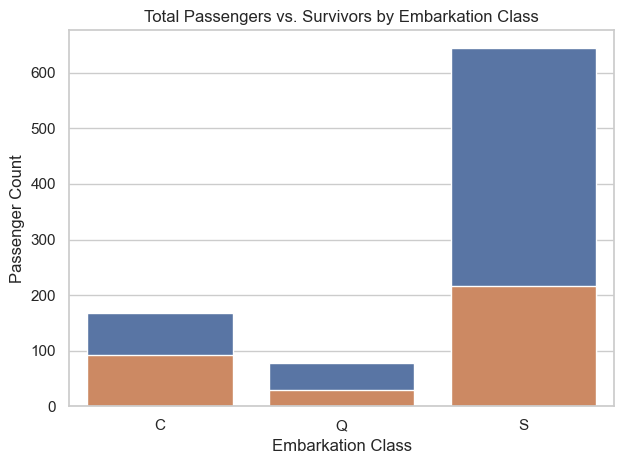

In [116]:
sns.barplot(x=embarked_data.index, y="Total", data=embarked_data)
sns.barplot(x=embarked_data.index, y="Survived", data=embarked_data,)

plt.xlabel("Embarkation Class")
plt.ylabel("Passenger Count")
plt.title("Total Passengers vs. Survivors by Embarkation Class")

plt.tight_layout()
plt.show()

In [113]:
embarked_data = embarked_total.join(embarked_survived)
embarked_data.columns = ['Total','Survived']
embarked_data

,Total,Survived
Embarked,,
C,168,93
Q,77,30
S,644,217


<Axes: xlabel='Total', ylabel='Count'>

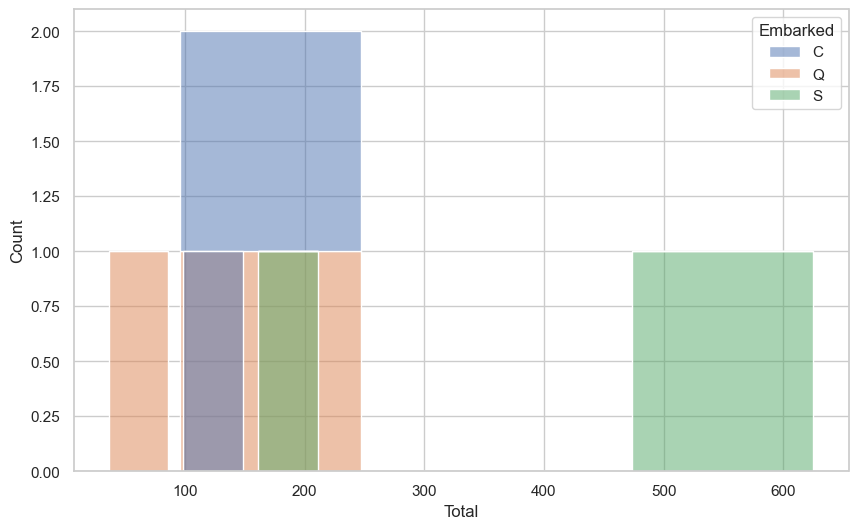

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))

sns.histplot(data = embarked_data,
             x="Total",
             hue="Embarked",
             multiple="stack",
             kde=True, 
             shrink=.8)

sns.histplot(data = embarked_data,
             x="Survived",
             hue="Embarked",
             multiple="stack",
             kde=True,
             shrink=.8)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


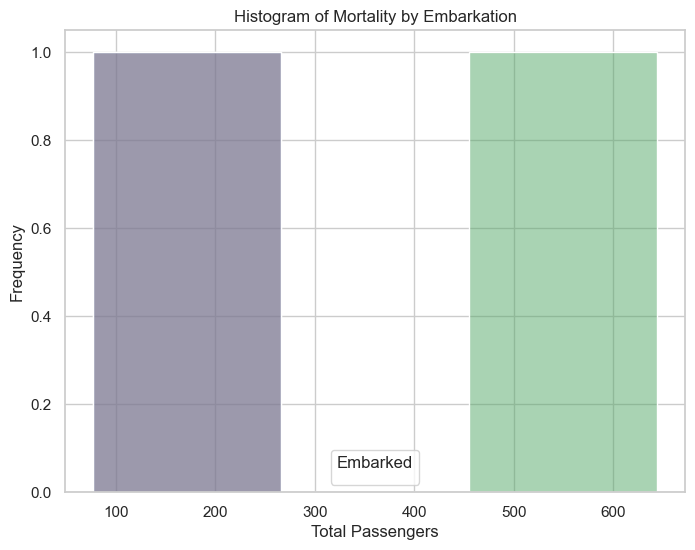

### Finding the survival chance of each Embarked

In [ ]:
titanic_survival

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [ ]:
survived_total

342

In [ ]:
embark_surv_rate = [ round(i / survived_total* 100, 2) for i in titanic_survival.groupby(["Embarked"])["Survived"].sum() ]

In [ ]:
(titanic_survival.groupby(["Embarked"])["Survived"].sum())

Embarked
C     93
Q     30
S    217
Name: Survived, dtype: int64

### After suming up the total survival of each Embarked we can see that S embarked seems to have the most chance of Survival rate of 63.45%

# Finding the survival rate of each cabin 

In [ ]:
cabin = titanic_cleaned.groupby('Cabin')["Survived"].sum()

NameError: name 'titanic_cleaned' is not defined

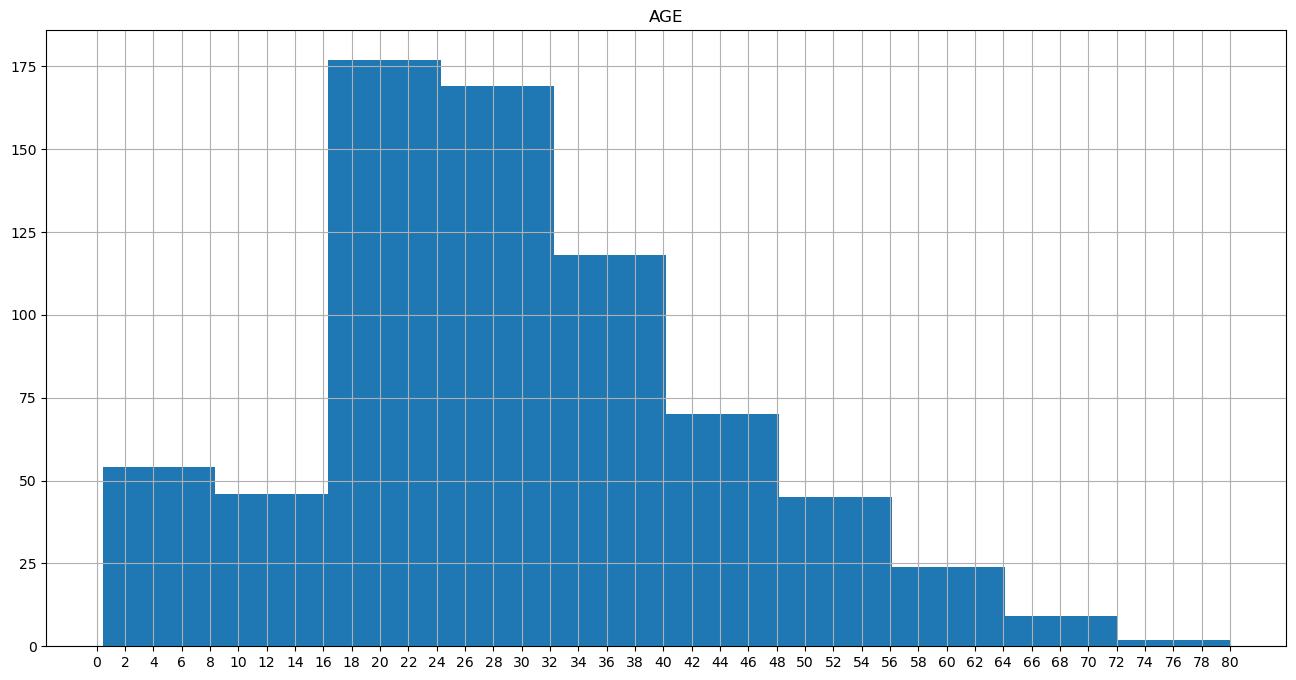

In [ ]:
plt.figure(figsize=(16, 8))

titanic_survival['Age'].hist()
plt.xticks(np.arange(0, 82, 2))

plt.title('AGE')
plt.show()

In [ ]:
travel_alone = titanic_survival[(titanic_survival['Parch'] == 0) & (titanic_survival["SibSp"] == 0)]

## We found that by traveling alone you have the survival chance of 47.66%

In [ ]:
(travel_alone["Survived"].sum() / survived_total) *100

47.66081871345029

In [ ]:
travel_together = titanic_survival[(titanic_survival['Parch'] > 0) & (titanic_survival["SibSp"] > 0)]

In [ ]:
(travel_together["Survived"].sum()/survived_total) * 100

18.128654970760234

## However , we found that if you were to travel with family memebers or together on board you have a slimmer chance of being survived, which is only 18.12%

In [ ]:
([titanic_survival.groupby("Sex")["Survived"].sum()] / survived_total) * 100

array([[68.12865497, 31.87134503]])

In [ ]:
titanic_survival.select_dtypes(["int64", 'float64']).corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,['Embarked']_C,['Embarked']_Q,['Embarked']_S
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658,-0.001205,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.081720
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,-0.082853,-0.074115,0.125722
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.036261,-0.022405,-0.032523
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.166603
['Embarked']_C,-0.001205,0.168240,-0.243292,-0.082853,0.036261,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.778359
['Embarked']_Q,-0.033606,0.003650,0.221009,-0.074115,-0.022405,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.496624


In [ ]:
titanic_survival.groupby("Pclass")["Survived"].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [ ]:
((titanic_survival.groupby("Pclass")["Survived"].sum()) / survived_total) * 100

Pclass
1    39.766082
2    25.438596
3    34.795322
Name: Survived, dtype: float64

In [ ]:
titanic_survival.groupby("Age")["Survived"].sum()

Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    0
70.50    0
71.00    0
74.00    0
80.00    1
Name: Survived, Length: 88, dtype: int64

In [ ]:
infant = titanic_survival[titanic_survival["Age"] <= 1]
kids = titanic_survival[(titanic_survival["Age"] > 1 ) & (titanic_survival["Age"] <= 17)]
adult = titanic_survival[(titanic_survival["Age"] > 17 ) & (titanic_survival["Age"] <= 74)]
grannies = titanic_survival[titanic_survival["Age"] >= 75]

In [ ]:
infant["Survived"].sum()

12

In [ ]:
infant_sv_rate = (infant["Survived"].sum() / survived_total) * 100

In [ ]:
infant_sv_rate

3.508771929824561

In [ ]:
len(infant[infant["Survived"] == 0])

2

In [ ]:
kids.Survived.sum()

49

In [ ]:
kids_sv_rate = (kids.Survived.sum() / survived_total) * 100

In [ ]:
kids_sv_rate

14.327485380116958

In [ ]:
len(kids["Survived"] == 0)

99

In [ ]:
adult.Survived.sum()

228

In [ ]:
adult_sv_rate = (adult.Survived.sum() / survived_total) *100

In [ ]:
len(adult[adult.Survived == 0])

372

In [ ]:
adult_sv_rate

66.66666666666666

In [ ]:
grannies.Survived.sum()

1

In [ ]:
len(grannies[grannies["Survived"] == 0])

0

In [ ]:
grannies

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,['Embarked']_C,['Embarked']_Q,['Embarked']_S
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",1,80.0,0,0,27042,30.0,A23,0,0,1


In [ ]:
titanic_survival.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,['Embarked']_C,['Embarked']_Q,['Embarked']_S
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.188552,0.086420,0.722783
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.391372,0.281141,0.447876
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [ ]:
age_normalized = titanic_survival[["Age" , "Survived"]]

In [ ]:
age_normalized.replace({np.NaN : 29.699118})

,Age,Survived
0,22.000000,0
1,38.000000,1
2,26.000000,1
3,35.000000,1
4,35.000000,0
...,...,...
886,27.000000,0
887,19.000000,1
888,29.699118,0
889,26.000000,1


In [ ]:
age_normalized.corr()

,Age,Survived
Age,1.000000,-0.077221
Survived,-0.077221,1.000000


In [ ]:
(age_normalized[(age_normalized["Age"] >= 18) & (age_normalized["Age"] < 75)]["Survived"].sum() / survived_total) * 100

66.66666666666666

In [ ]:
(177 / 819) * 100

21.611721611721613

In [ ]:
age_cat = {'infant':  infant ,"kids" :  kids ,"adult" :  adult , "granny" :  grannies }

<Axes: >

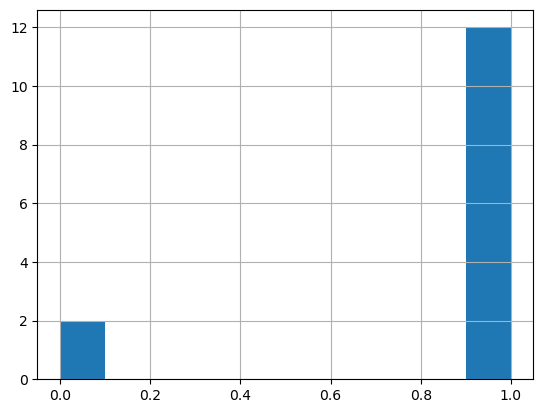

In [ ]:
infant["Survived"].hist()

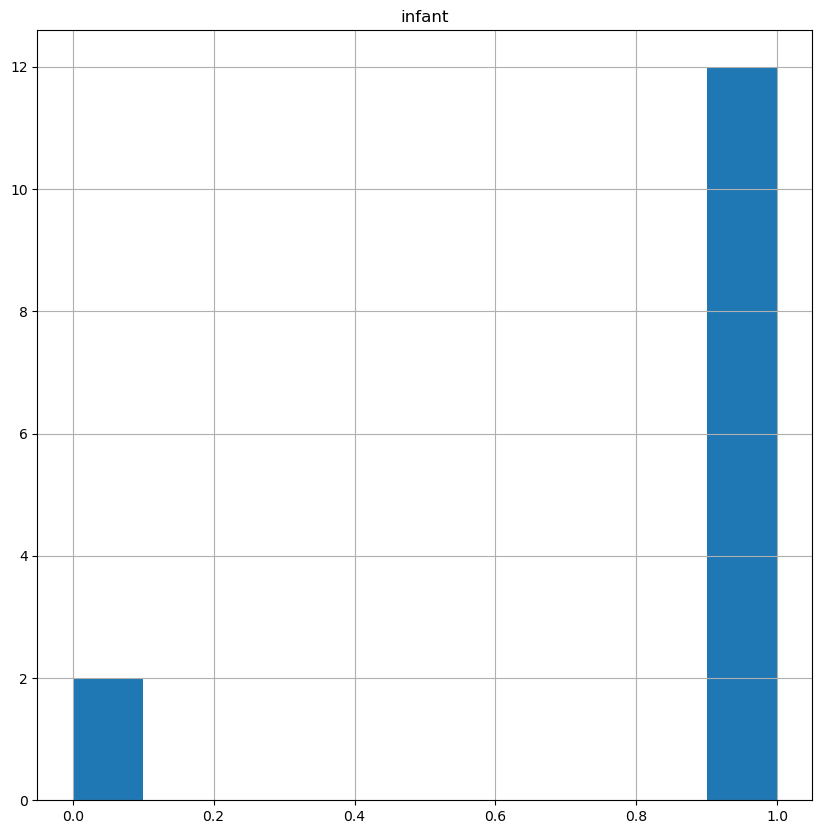

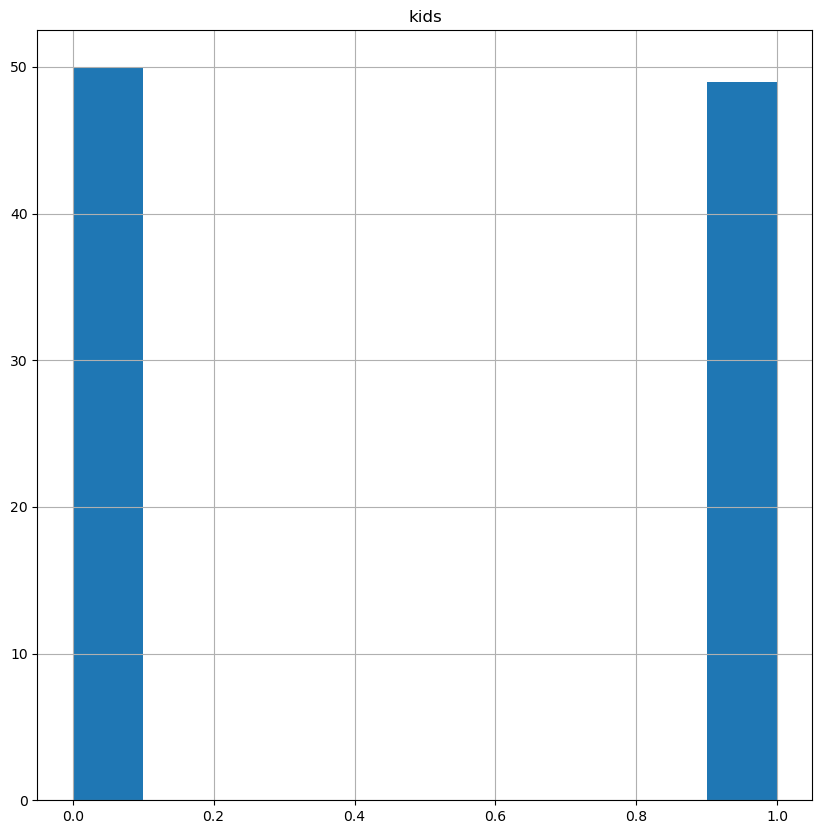

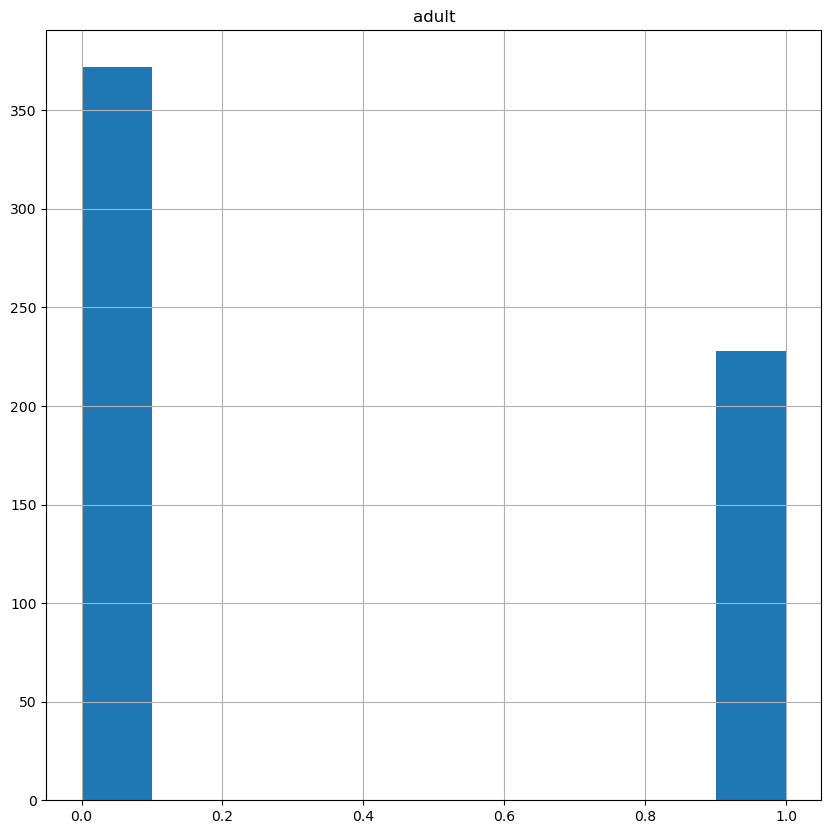

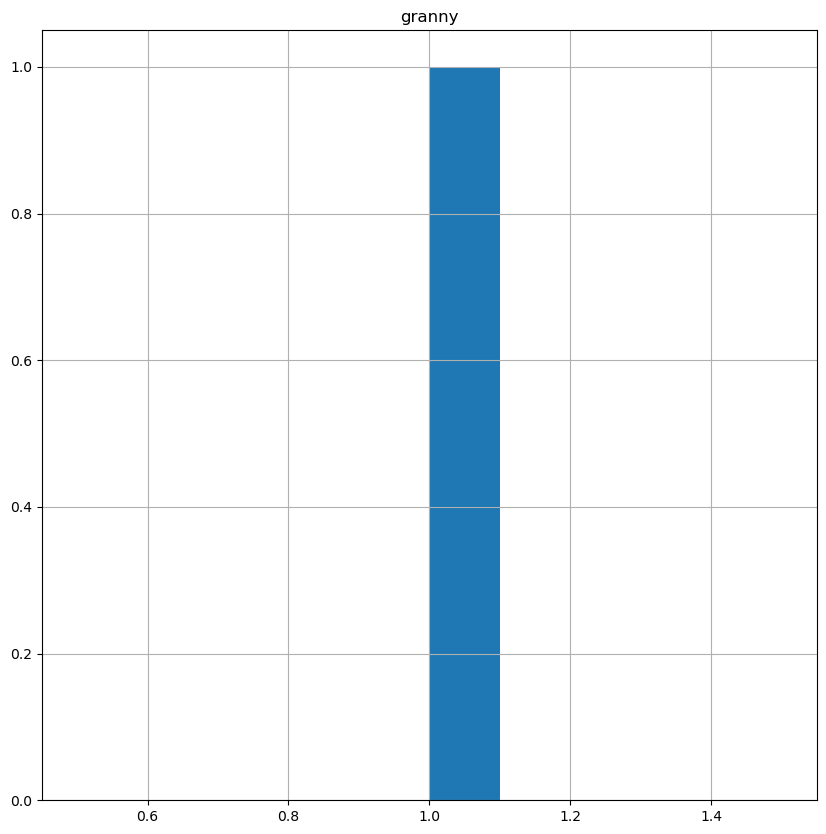

In [ ]:
for i in age_cat.items():
    plt.figure(figsize=(10,10))
    i[1]["Survived"].hist()
    plt.title(i[0])

Text(0.5, 1.0, 'Travel Alone')

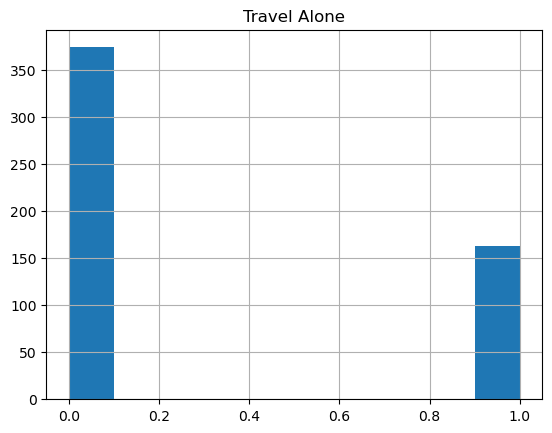

In [ ]:
travel_alone["Survived"].hist()
plt.title("Travel Alone")

Text(0.5, 1.0, 'Travel Together')

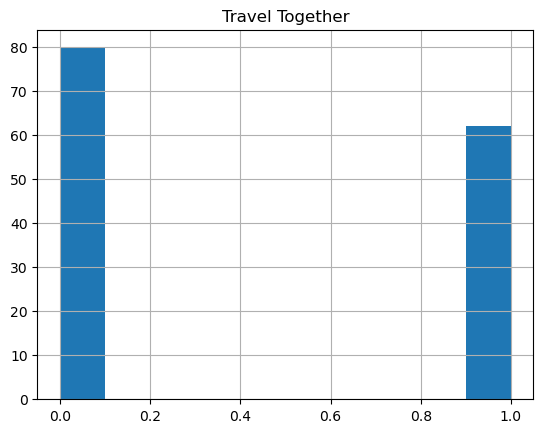

In [ ]:
travel_together["Survived"].hist()
plt.title("Travel Together")

Text(0.5, 1.0, 'Female')

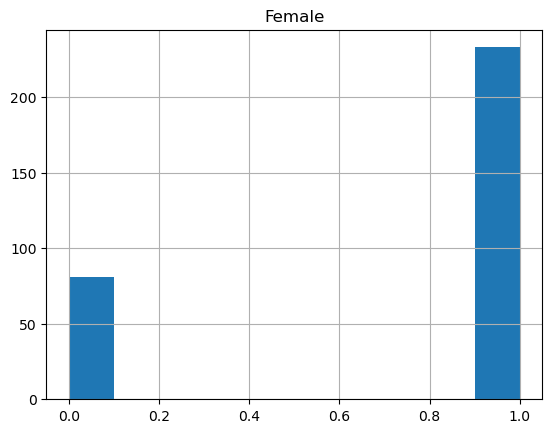

In [ ]:
titanic_survival[titanic_survival["Sex"] == 0]["Survived"].hist()
plt.title("Female")

Text(0.5, 1.0, 'Male')

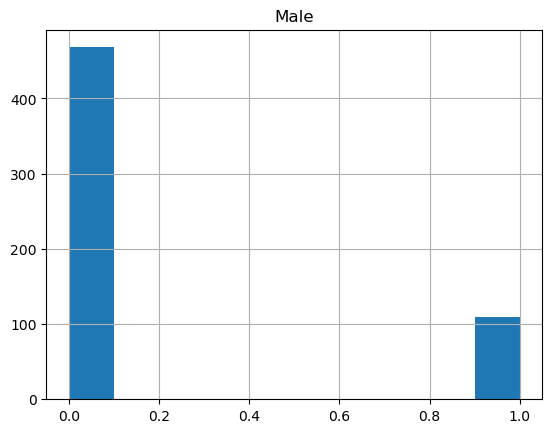

In [ ]:
titanic_survival[titanic_survival["Sex"] == 1]["Survived"].hist()
plt.title("Male")

Text(0.5, 1.0, 'S Embark')

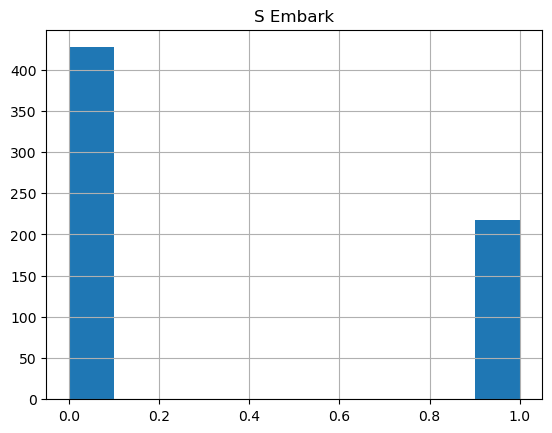

In [ ]:
embark[embark["Embarked"] == "S"]["Survived"].hist()
plt.title("S Embark")

Text(0.5, 1.0, 'C Embark')

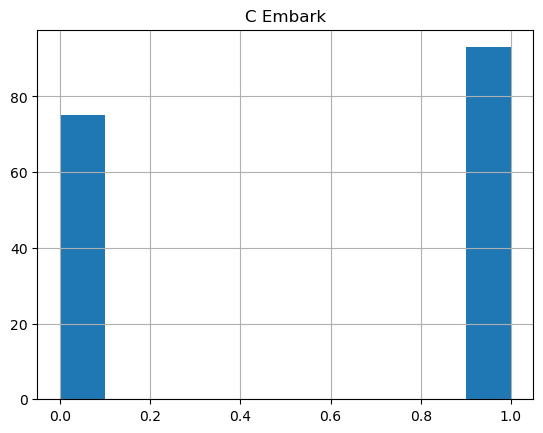

In [ ]:
embark[embark["Embarked"] == "C"]["Survived"].hist()
plt.title("C Embark")

Text(0.5, 1.0, 'Q Embark')

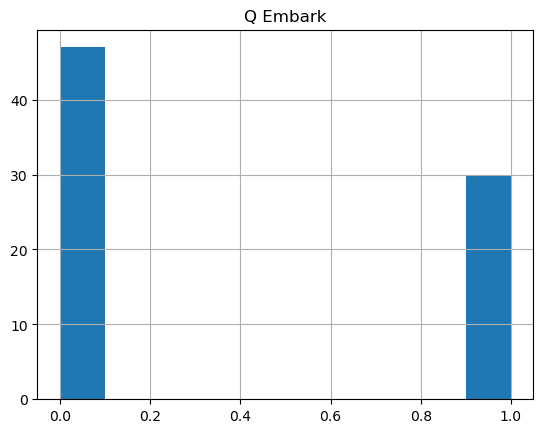

In [ ]:
embark[embark["Embarked"] == "Q"]["Survived"].hist()
plt.title("Q Embark")

Text(0.5, 1.0, 'Survived')

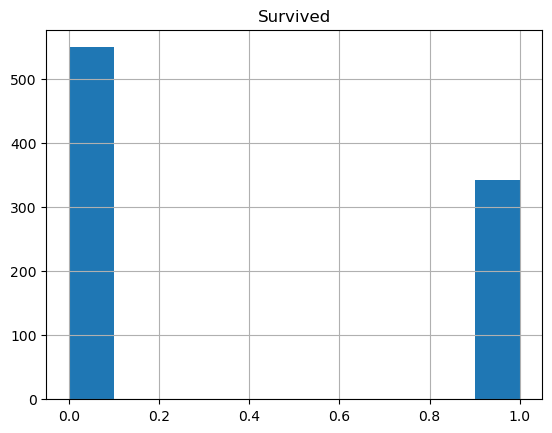

In [ ]:
titanic_survival["Survived"].hist()
plt.title("Survived")

Text(0.5, 1.0, 'Pclass 1')

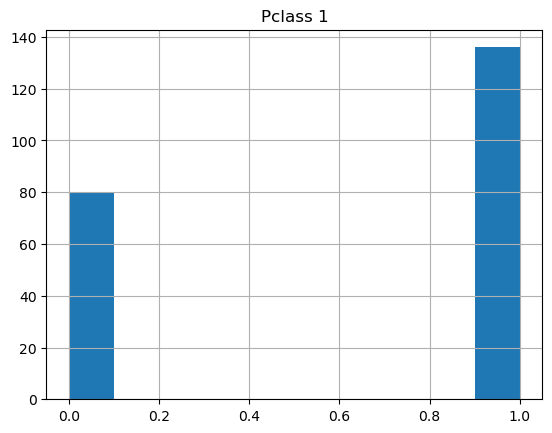

In [ ]:
titanic_survival[titanic_survival["Pclass"] == 1]["Survived"].hist()
plt.title("Pclass 1")

Text(0.5, 1.0, 'Pclass 2')

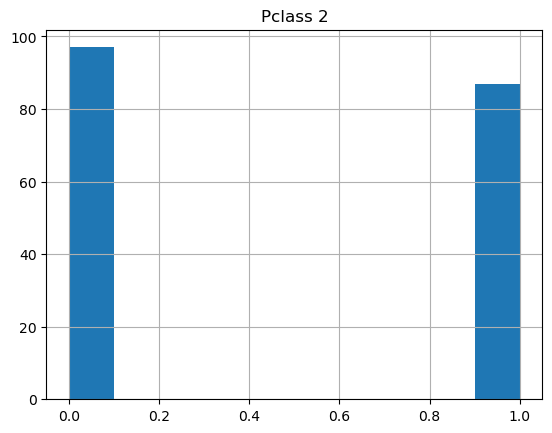

In [ ]:
titanic_survival[titanic_survival["Pclass"] == 2]["Survived"].hist()
plt.title("Pclass 2")

Text(0.5, 1.0, 'Pclass 3')

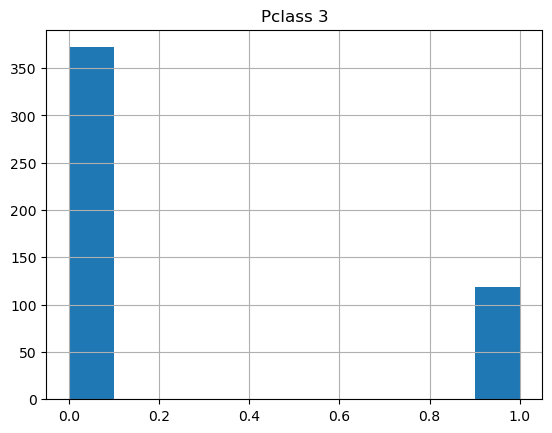

In [ ]:
titanic_survival[titanic_survival["Pclass"] == 3]["Survived"].hist()
plt.title("Pclass 3")

In [ ]:
titanic_survival[titanic_survival["Survived"] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,['Embarked']_C,['Embarked']_Q,['Embarked']_S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",0,15.0,0,0,2667,7.2250,NaN,1,0,0
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",0,56.0,0,1,11767,83.1583,C50,1,0,0
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",0,25.0,0,1,230433,26.0000,NaN,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,0,0,1


<Axes: >

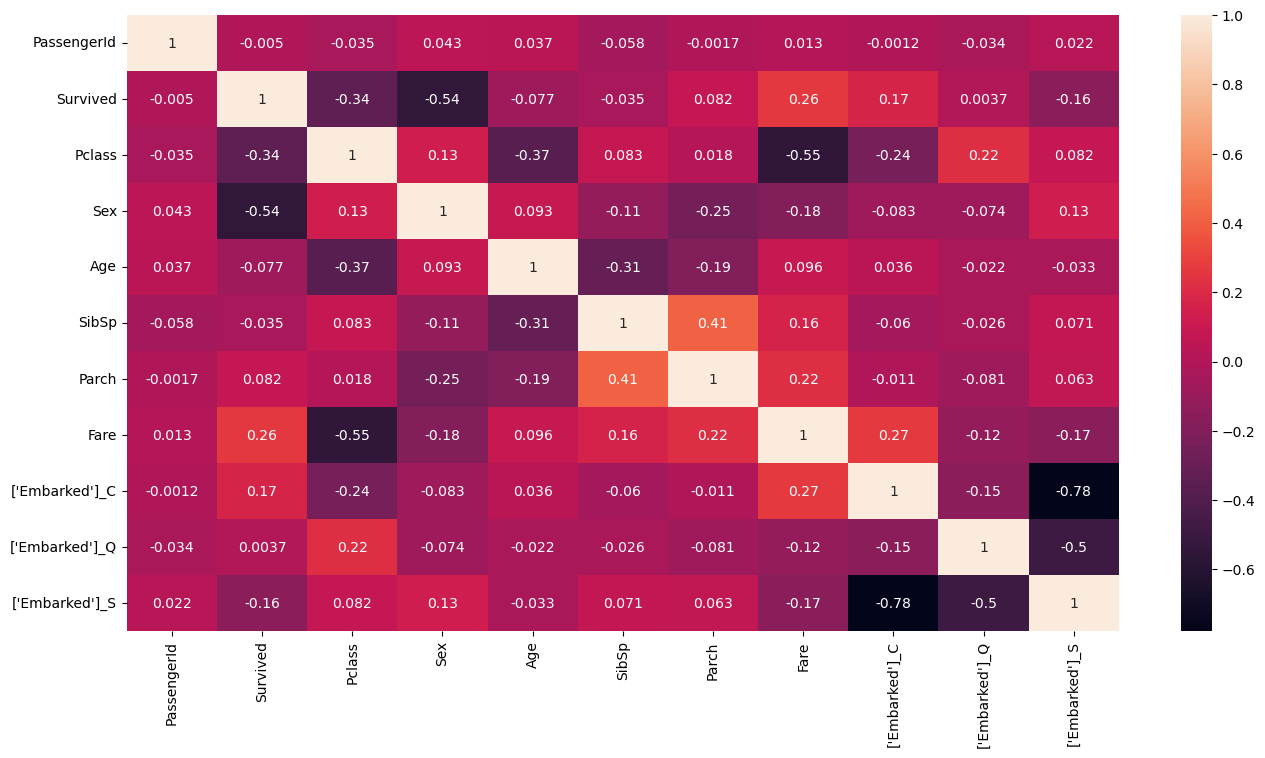

In [ ]:
plt.figure(figsize=(16, 8))

sns.heatmap(data=titanic_survival.select_dtypes(['float64', 'int64']).corr(), annot=True)